In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [11]:
def runge_kutta(func, t, y,h):
    k1 = h * func(t,     y)
    k2 = h * func(t+h/2, y+k1/2)
    k3 = h * func(t+h/2, y+k2/2)
    k4 = h * func(t+h,   y+k3)
    
    dy = k1/6 + k2/3 + k3/3 + k4/6
    return y + dy

In [38]:
def func_thomas(t, y):
    dy0dt = -3.7 * y[0] + 5.0 * np.sin(4 * y[1])
    dy1dt = -3.7 * y[1] + 5.0 * np.sin(4 * y[2])
    dy2dt = -3.7 * y[2] + 5.0 * np.sin(4 * y[0])
    return np.stack([dy0dt, dy1dt, dy2dt], axis=0)

In [50]:
y0 = [-1.0, -1.0, 0.0]

t_start = 0.0
t_end = 10.0
h = 0.01
t_eval = np.arange(t_start, t_end, h)

ys = [y0]
ts = []

for t in t_eval[:-1]:
    y = runge_kutta(func_thomas, t, ys[-1], h)
    ys.append(y)
    ts.append(t)
ys = np.stack(ys, axis=1)   # (3,1) のndarrayの系列を一つのndarrayにまとめる

/var/folders/g8/lw05g79s3yv331w4vf305fkh0000gn/T/ipykernel_61653/2857780017.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


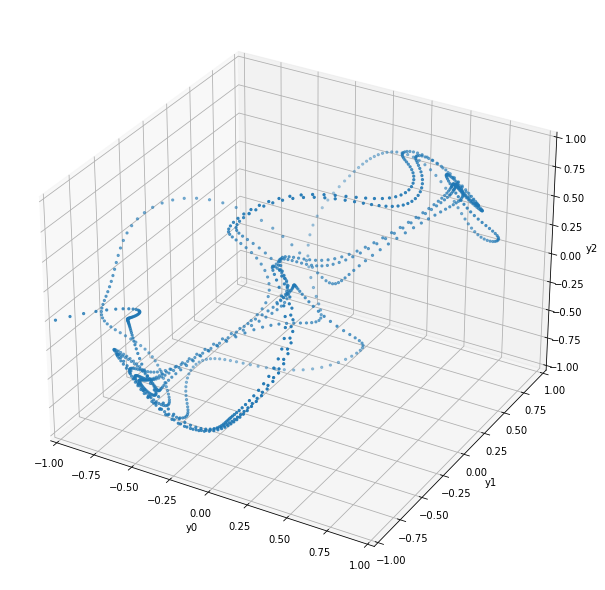

In [51]:
fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig)
ax.scatter(ys[0], ys[1], ys[2], marker='.')

ax.set_xlabel('y0')
ax.set_xlim(-1,1)
ax.set_ylabel('y1')
ax.set_ylim(-1,1)
ax.set_zlabel('y2')
ax.set_zlim(-1,1)
#ax.set_aspect('auto')

plt.show()